# Suicide Rates Overview 1985 to 2016

## Importation Zone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## RawData Identification

In [3]:
raw_data = pd.read_csv('data/data.csv')

print(f'Number of Rows: {raw_data.shape[0]} & Numbers of Columns: {raw_data.shape[1]}')

print('The Labels of the columns are: ')
for column_label in raw_data.columns:
    print(column_label)

print('Dataset Additional Information: ')
raw_data.info(memory_usage=False)

print('Data Structure: ')
raw_data.head()


Number of Rows: 27820 & Numbers of Columns: 12
The Labels of the columns are: 
country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation
Dataset Additional Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## What is the country with more suicides just by number?

In [4]:
country_suicides = raw_data[['country', 'suicides_no']]
country_suicides = country_suicides.groupby('country').count().sort_values(by=['suicides_no'],ascending=False)
country_suicides.head(5)

,suicides_no
country,
Mauritius,382
Austria,382
Netherlands,382
Iceland,382
Brazil,372


In [5]:
mauritius_suicides_data = raw_data[raw_data['country'] == 'Mauritius']
mauritius_suicides_data = mauritius_suicides_data[['country', 'year', 'sex', 'age', 'suicides_no']]

mauritius_suicides_sex = mauritius_suicides_data[['sex', 'suicides_no']]
mauritius_suicides_year = mauritius_suicides_data[['year', 'suicides_no']]
mauritius_suicides_age = mauritius_suicides_data[['age', 'suicides_no']]

mauritius_suicides_sex = mauritius_suicides_sex.groupby('sex').sum()
mauritius_suicides_year = mauritius_suicides_year.groupby('year').sum()
mauritius_suicides_age = mauritius_suicides_age.groupby('age').sum().sort_values(by=['suicides_no'],ascending=False)
mauritius_data = [mauritius_suicides_sex, mauritius_suicides_year, mauritius_suicides_age]

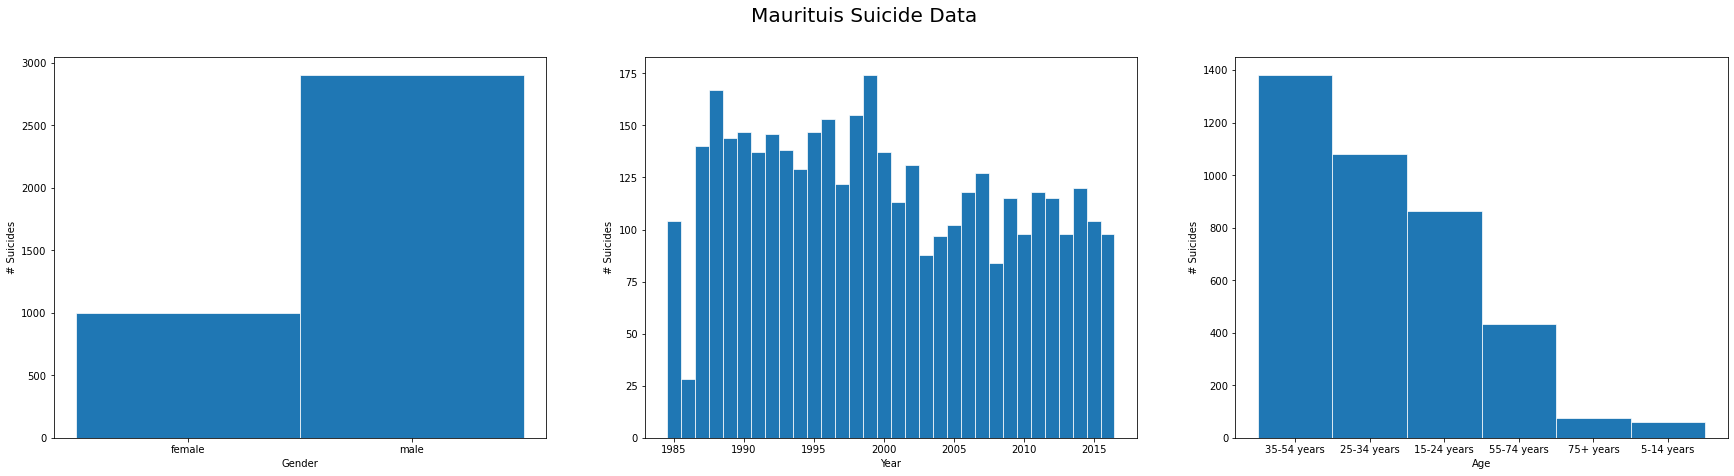

In [10]:
x_labels = ['Gender', 'Year', 'Age']
fig, axs = plt.subplots(1, 3)
for i in range(3):

    y = list(mauritius_data[i]['suicides_no'])
    x = list(mauritius_data[i].index)

    axs[i].bar(x, y, width=1, edgecolor="white", linewidth=0.7)
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel('# Suicides')

fig.suptitle('Maurituis Suicide Data', fontsize=20)    
fig.set_size_inches(30, 7)
plt.show()

## What is the year with more suicides ?

In [20]:
year_more_suicides = raw_data[['year', 'suicides_no']]
year_more_suicides = year_more_suicides.groupby(['year']).sum()
year_more_suicides.sort_values(by=['suicides_no'], ascending=False).head(1)



,suicides_no
year,
1999,256119


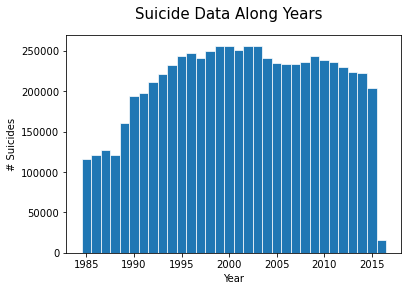

In [35]:
fig, ax = plt.subplots()

y = list(year_more_suicides['suicides_no'])
x = list(year_more_suicides.index)

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('# Suicides')
fig.suptitle('Suicide Data Along Years', fontsize=15)    

plt.show()


## Who commit more suicides Male/Female?

In [42]:
sex_suicide_data = raw_data[['sex', 'suicides_no']]
sex_suicide_data = sex_suicide_data.groupby(['sex']).sum()
sex_suicide_data.sort_values(by=['suicides_no'], ascending=False)

,suicides_no
sex,
male,5188910
female,1559510


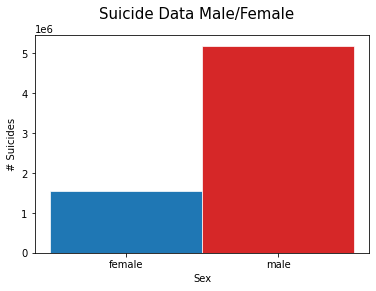

In [45]:
fig, ax = plt.subplots()

y = list(sex_suicide_data['suicides_no'])
x = list(sex_suicide_data.index)

bar_colors = ['tab:blue', 'tab:red']
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7, color=bar_colors)

ax.set_xlabel('Sex')
ax.set_ylabel('# Suicides')
fig.suptitle('Suicide Data Male/Female', fontsize=15)    

plt.show()